<a href="https://colab.research.google.com/github/tomfaulkenberry/courses/blob/master/summer2019/mathpsychREU/lecture5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Lecture 5 -- Parametric Bootstrapping


import numpy as np
from scipy.optimize import minimize

In [0]:
# recall our Murdock (1961) forgetting data

T = np.array([1, 3, 6, 9, 12, 18])
Y = np.array([0.94, 0.77, 0.4, 0.26, 0.24, 0.16])
data = np.array([T,Y])

In [0]:
# a simple function to do MLE and return parameters

def fitPower(dat):
  # extract X and T from the dat array
  T = dat[0]
  X = 100*dat[1]
  
  # computed nll
  def nllP(pars):
    a, b = pars
    tmp1 = X*np.log(a*T**b)
    tmp2 = (100-X)*np.log(1-a*T**b)
    return(-1*np.sum(tmp1+tmp2))
  
  # minimize the nll
  a_init = np.random.uniform()
  b_init = -np.random.uniform()
  inits = np.array([a_init, b_init])
  
  mleP = minimize(nllP,
                 inits,
                 method = "nelder-mead")
  
  # return fit object
  return mleP.x[0], mleP.x[1]

In [0]:
# assign output to tuple (a,b)
# this makes it easier to call specific parameters later

a, b = fitPower(data)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.


In [0]:
# bootstrapping requires us to be able to 
# generate vector of random draws from binomial distribution
# where p is a power function of time T

np.random.seed(737)
np.random.binomial(n=100, p=a*T**b, size=len(T))

array([96, 61, 37, 41, 25, 21])

In [0]:
# we also need to be able to collect fitted values of a and b
# as we go along.  The fastest way is with a Python list

A = []
for i in range(150):
  A.append(i)

In [36]:
# now, we do the bootstrapping

# set number of bootstrap samples
N = 1000

# set seed for reproducibility
np.random.seed(500)

# obtain the original model fit
a, b = fitPower(data)

# set empty lists to store parameter values
A = []
B = []

for i in range(N):
  # generate new data
  Xsim = np.random.binomial(n=100, p=a*T**b, size=len(T))
  dataSim = np.array([T, Xsim/100])
  
  # find MLE for a,b
  a_bootstrap, b_bootstrap = fitPower(dataSim)
  
  # append these estimates to A and B
  A.append(a_bootstrap)
  B.append(b_bootstrap)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


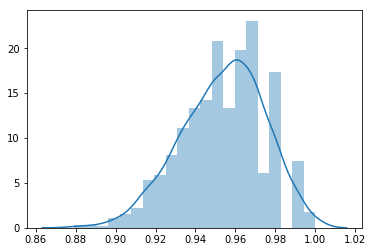

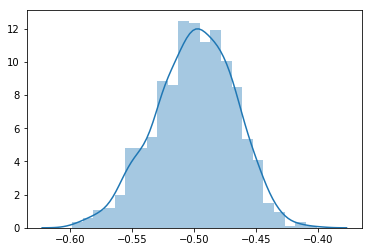

In [37]:
# plot histograms of A and B

import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(A)
plt.show()

sns.distplot(B)
plt.show()

In [39]:
# compute 95% confidence intervals for estimates a and b

print(np.quantile(A, q=[0.025, 0.975])) 
print(np.quantile(B, q=[0.025, 0.975]))

[0.91026039 0.99020124]
[-0.56463159 -0.44326388]
